In [1]:
import numpy as np
import PyUtils
import cv2 
import matplotlib.pyplot as plt
from scipy import special

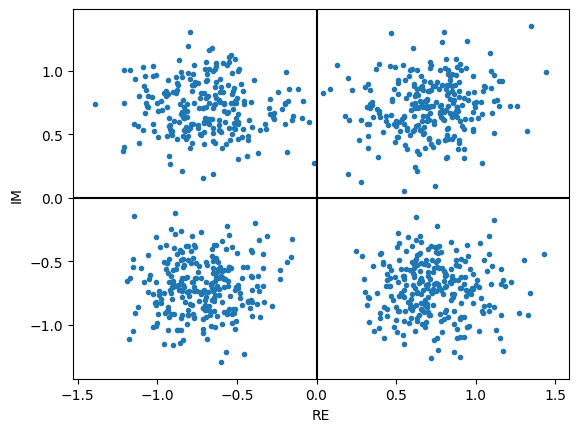

In [3]:
Rx = PyUtils.GetMatFromBin("../build/Rx.bin")
RE,IM = cv2.split(Rx)
plt.scatter(RE, IM, marker='.')
plt.xlabel("RE")
plt.ylabel("IM")
plt.axhline(0, color='black')
plt.axvline(0, color='black')

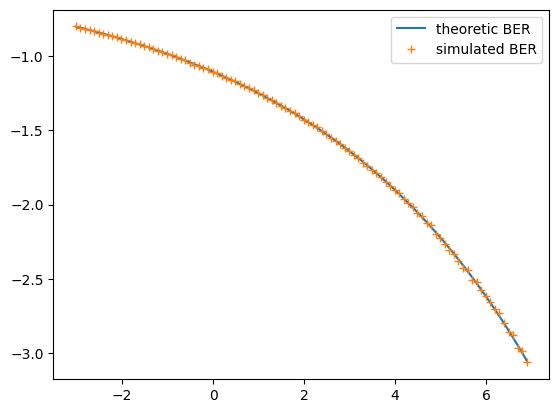

In [7]:
BER = PyUtils.GetMatFromBin("../build/BER.bin")
BER = np.resize(BER,(BER.shape[0],1))
SNR_log = np.arange(0,BER.shape[0])*0.1
SNR_log = np.resize(SNR_log, (BER.shape[0],1))
SNR_lin = np.power(10, SNR_log/10)
EbN0 = SNR_lin/2;
EsN0_log = 10*np.log10(EbN0);
BER_theo = 0.5*special.erfc(np.sqrt(EbN0))
plt.plot(EsN0_log,np.log10(BER_theo), label="theoretic BER")
plt.plot(EsN0_log,np.log10(BER),'+', label="simulated BER")
plt.legend()
